<a href="https://colab.research.google.com/github/ArminD93/cost_livning_dataset/blob/dev/Cost_living_apartament.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import zeszytu z ustawieniami:
%cd '/content/drive/My Drive/ColabNotebooks/Cost_living/'
%run Cost_living_configuration.ipynb

/content/drive/My Drive/ColabNotebooks/Cost_living
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Columns: 162 entries, Unnamed: 0 to Quito, Ecuador
dtypes: float64(160), object(2)
memory usage: 64.1 KB


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [2]:
# Utworzenie obiektu data frame, gdzie będą przechowywane infomracje o apartamentach:
apartament = df_transponed['apartament']
apartament.head()

Unnamed: 0                                        1Bed_Apartment_CityCentre  ...  Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment
Region          Country            City                                      ...                                                              
Caribbean       Dominican Republic Santo Domingo                     381.17  ...                                              53.67           
Central America Costa Rica         San Jose                          461.72  ...                                              65.12           
                Mexico             Guadalajara                       309.42  ...                                              22.64           
                                   Mexico City                       550.18  ...                                              30.09           
                                   Monterrey                         342.55  ...                                              49.81           

[5 rows x 7 columns]

In [3]:
apartament.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 160 entries, (Caribbean, Dominican Republic, Santo Domingo) to (Western Europe, Switzerland, Zurich)
Data columns (total 7 columns):
1Bed_Apartment_CityCentre                                       160 non-null float64
1Bed_Apartment_OutsideofCentre                                  160 non-null float64
3Bed_Apartment_CityCentre                                       160 non-null float64
3Bed_Apartment_OutsideofCentre                                  160 non-null float64
Apartment_OutsideOfCentre_PricePerm2                            160 non-null float64
Apartment_inCityCentre_PricePerm2                               160 non-null float64
Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment    160 non-null float64
dtypes: float64(7)
memory usage: 26.6 KB


In [4]:
apartament.index

MultiIndex([(      'Caribbean', 'Dominican Republic', 'Santo Domingo'),
            ('Central America',         'Costa Rica',      'San Jose'),
            ('Central America',             'Mexico',   'Guadalajara'),
            ('Central America',             'Mexico',   'Mexico City'),
            ('Central America',             'Mexico',     'Monterrey'),
            ('Central America',             'Panama',   'Panama City'),
            (   'Central Asia',         'Kazakhstan',        'Almaty'),
            ( 'Eastern Africa',              'Kenya',       'Nairobi'),
            (   'Eastern Asia',              'China',       'Beijing'),
            (   'Eastern Asia',              'China',      'Shanghai'),
            ...
            ( 'Western Europe',             'France',         'Paris'),
            ( 'Western Europe',            'Germany',        'Berlin'),
            ( 'Western Europe',            'Germany',     'Frankfurt'),
            ( 'Western Europe',            'Germ

In [0]:
apartament.reset_index(inplace=True)
apartament.set_index(['Country'],inplace=True)

Text(0.5, 1.0, '1Bed apartment in city centre')

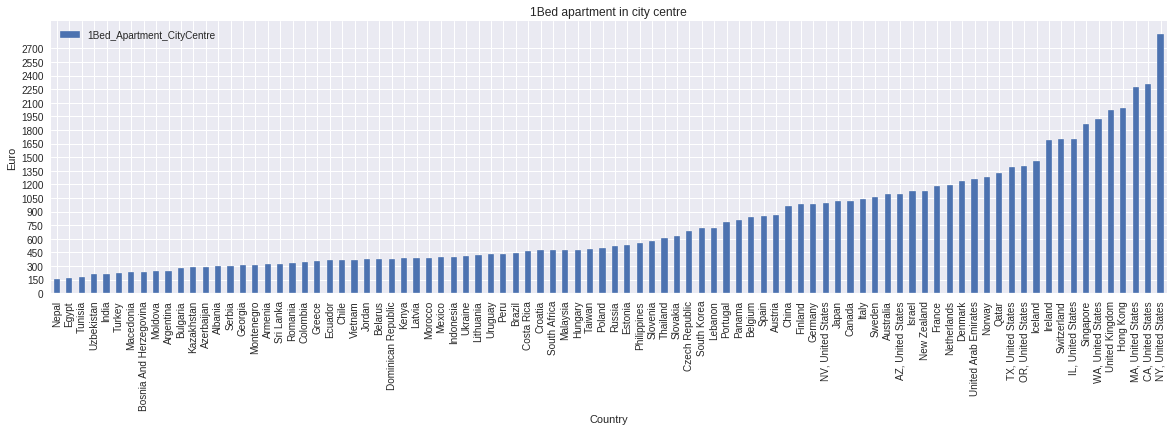

In [6]:
apartament_country_groups = apartament.groupby(by='Country')

Country_1Bed_cityCentre_mean = apartament_country_groups.agg({'1Bed_Apartment_CityCentre' : 'mean'})

# Posortowanie wartości:
Country_1Bed_cityCentre_mean.sort_values(by='1Bed_Apartment_CityCentre', inplace=True)

plt.style.use('seaborn')

Country_1Bed_cityCentre_mean.plot(figsize=(20,5), kind ='bar')
plt.yticks(np.arange(0, 2750, step=150))
plt.ylabel('Euro')
plt.title('1Bed apartment in city centre')


In [7]:
apartament.reset_index(inplace=True)
apartament.index

RangeIndex(start=0, stop=160, step=1)

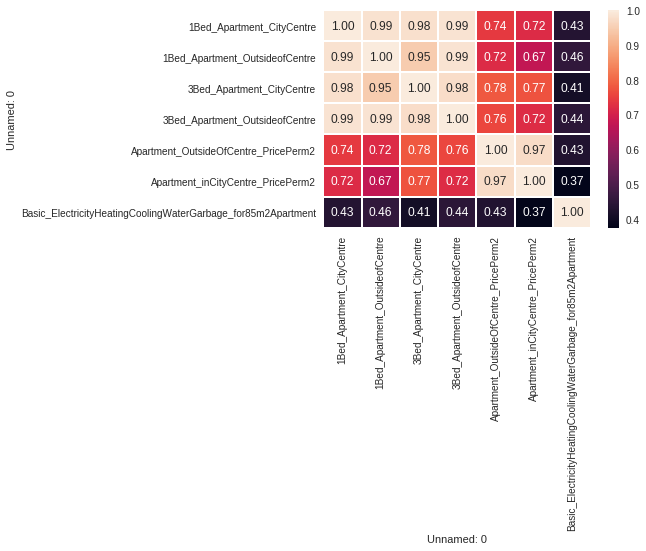

In [8]:
corr= apartament.corr()

fig = plt.figure(figsize=(6,4))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt='.2f', linewidth=1)

In [9]:
# Posortowanie wartości
aparatamentSortedByRegion = apartament.sort_values(by='Region')

# Pogrupowanie danych
RegionGroups = aparatamentSortedByRegion.groupby(by='Region')

RegionGroupsBed_mean = RegionGroups.agg({
                                      '1Bed_Apartment_CityCentre'      : 'mean',
                                      '1Bed_Apartment_OutsideofCentre' : 'mean',

                                      '3Bed_Apartment_CityCentre'      : 'mean',
                                      '3Bed_Apartment_OutsideofCentre' : 'mean',
                                      
                                      'Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment'  : 'mean'   
                                      })

RegionGroupsBed_mean.head()

,1Bed_Apartment_CityCentre,1Bed_Apartment_OutsideofCentre,3Bed_Apartment_CityCentre,3Bed_Apartment_OutsideofCentre,Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment
Region,,,,,
Caribbean,381.170000,203.640000,754.180,359.540000,53.670000
Central America,495.100000,338.130000,960.874,660.954000,51.728000
Central Asia,288.220000,178.040000,565.150,357.570000,58.480000
Eastern Africa,383.880000,170.650000,832.140,403.170000,46.900000
Eastern Asia,1029.163333,647.196667,2330.525,1365.758333,110.833333


In [10]:
RegionGroupsBed_mean.reset_index(inplace=True)
RegionGroupsBed_mean.index

RangeIndex(start=0, stop=17, step=1)

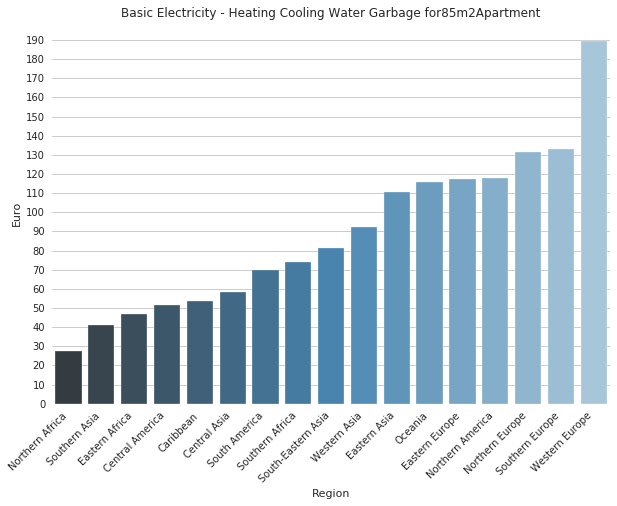

In [11]:
SortedBed_RegionGroups_mean = RegionGroupsBed_mean.sort_values(by='Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment')

x_data= 'Region'
sns.set_style('whitegrid') 
plt.figure(figsize=(10,7))
plt.yticks(np.arange(0, 250, step=10))

g = sns.barplot(  data=SortedBed_RegionGroups_mean, x=x_data,  y='Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment',palette='Blues_d'  )

g.set( xlabel='Region', ylabel='Euro', title='Basic Electricity - Heating Cooling Water Garbage for85m2Apartment')
g.set_xticklabels( g.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light' )
plt.show()

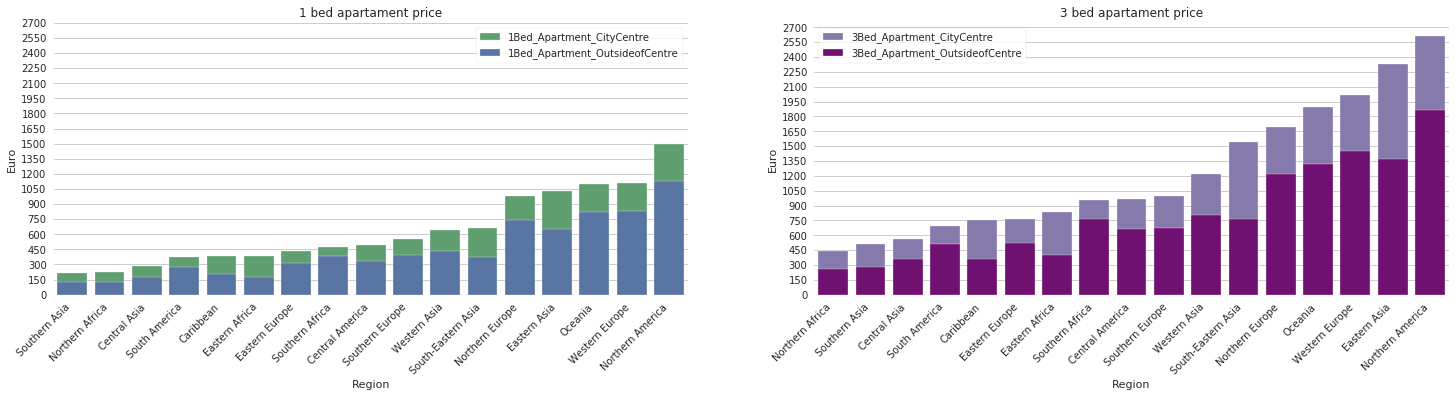

In [12]:
sns.set_style('whitegrid') 
f, axes = plt.subplots(1, 2, figsize=(25, 5))

SortedBed_RegionGroups_mean = RegionGroupsBed_mean.sort_values(by='1Bed_Apartment_CityCentre')


g = sns.barplot(x="Region", y="1Bed_Apartment_CityCentre", data=SortedBed_RegionGroups_mean, label="1Bed_Apartment_CityCentre", color="g", ax=axes[0] )       
g = sns.barplot(x="Region", y="1Bed_Apartment_OutsideofCentre", data=SortedBed_RegionGroups_mean,  label="1Bed_Apartment_OutsideofCentre", color="b", ax=axes[0])
g.set( xlabel='Region',ylabel='Euro', title='1 bed apartament price'  )
g.set_xticklabels(  g.get_xticklabels(), rotation=45, horizontalalignment='right',  fontweight='light',)


SortedBed_RegionGroups_mean = RegionGroupsBed_mean.sort_values(by='3Bed_Apartment_CityCentre')
g2 = sns.barplot(x="Region", y="3Bed_Apartment_CityCentre", data=SortedBed_RegionGroups_mean, label="3Bed_Apartment_CityCentre", color="m", ax=axes[1])       
g2 = sns.barplot(x="Region", y="3Bed_Apartment_OutsideofCentre", data=SortedBed_RegionGroups_mean,  label="3Bed_Apartment_OutsideofCentre", color="purple", ax=axes[1])
g2.set( xlabel='Region',ylabel='Euro', title='3 bed apartament price'  )
g2.set_xticklabels(  g2.get_xticklabels(), rotation=45, horizontalalignment='right',  fontweight='light',)


axes[0].set_yticks(np.arange(0, 2750, step=150))
axes[1].set_yticks(np.arange(0, 2750, step=150))

axes[0].legend( frameon=True)
axes[1].legend( frameon=True)
plt.show()

In [13]:
apartament.reset_index(inplace=True)
apartament.set_index(['Region', 'Country','City'],inplace=True)
apartament.head()

Unnamed: 0                                        index  ...  Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment
Region          Country            City                  ...                                                              
Caribbean       Dominican Republic Santo Domingo      0  ...                                              53.67           
Central America Costa Rica         San Jose           1  ...                                              65.12           
                Mexico             Guadalajara        2  ...                                              22.64           
                                   Mexico City        3  ...                                              30.09           
                                   Monterrey          4  ...                                              49.81           

[5 rows x 8 columns]

In [14]:
apartament.reset_index(inplace=True)
apartament.set_index(['Country','City'],inplace=True)
apartament.index

MultiIndex([('Dominican Republic', 'Santo Domingo'),
            (        'Costa Rica',      'San Jose'),
            (            'Mexico',   'Guadalajara'),
            (            'Mexico',   'Mexico City'),
            (            'Mexico',     'Monterrey'),
            (            'Panama',   'Panama City'),
            (        'Kazakhstan',        'Almaty'),
            (             'Kenya',       'Nairobi'),
            (             'China',       'Beijing'),
            (             'China',      'Shanghai'),
            ...
            (            'France',         'Paris'),
            (           'Germany',        'Berlin'),
            (           'Germany',     'Frankfurt'),
            (           'Germany',       'Hamburg'),
            (           'Germany',        'Munich'),
            (       'Netherlands',     'Amsterdam'),
            (       'Netherlands',     'Eindhoven'),
            (       'Netherlands',     'Rotterdam'),
            (       'Netherlan

In [15]:
apartament['Region'].value_counts()

Eastern Europe        28
Northern America      21
Southern Europe       18
Western Asia          14
Northern Europe       13
Southern Asia         13
Western Europe        12
South-Eastern Asia     7
South America          7
Oceania                6
Eastern Asia           6
Central America        5
Northern Africa        4
Southern Africa        3
Caribbean              1
Eastern Africa         1
Central Asia           1
Name: Region, dtype: int64

In [16]:
apartament.head()

Unnamed: 0                                 Region  ...  Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment
Country            City                            ...                                                              
Dominican Republic Santo Domingo        Caribbean  ...                                              53.67           
Costa Rica         San Jose       Central America  ...                                              65.12           
Mexico             Guadalajara    Central America  ...                                              22.64           
                   Mexico City    Central America  ...                                              30.09           
                   Monterrey      Central America  ...                                              49.81           

[5 rows x 9 columns]

In [17]:
apartament.reset_index(inplace=True)
apartament.index

RangeIndex(start=0, stop=160, step=1)

In [18]:
apartament.sample(frac=0.02)

Unnamed: 0,Country,City,Region,index,1Bed_Apartment_CityCentre,1Bed_Apartment_OutsideofCentre,3Bed_Apartment_CityCentre,3Bed_Apartment_OutsideofCentre,Apartment_OutsideOfCentre_PricePerm2,Apartment_inCityCentre_PricePerm2,Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment
66,"WA, United States",Seattle,Northern America,66,1919.17,1450.04,3199.48,2321.44,4065.00,6588.64,144.15
31,Romania,Timisoara,Eastern Europe,31,287.68,217.44,531.19,385.53,1053.88,1376.56,95.29
37,Ukraine,Kharkiv,Eastern Europe,37,346.56,217.86,615.91,392.63,525.36,961.38,117.46


In [19]:
apartamentGreaterthan400 = apartament['1Bed_Apartment_CityCentre'] >= 400
apartament[apartamentGreaterthan400].head(3)

Unnamed: 0,Country,City,Region,index,1Bed_Apartment_CityCentre,1Bed_Apartment_OutsideofCentre,3Bed_Apartment_CityCentre,3Bed_Apartment_OutsideofCentre,Apartment_OutsideOfCentre_PricePerm2,Apartment_inCityCentre_PricePerm2,Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment
1,Costa Rica,San Jose,Central America,1,461.72,405.66,884.11,757.82,1305.61,1412.49,65.12
3,Mexico,Mexico City,Central America,3,550.18,342.38,1139.78,734.62,1438.46,2188.90,30.09
5,Panama,Panama City,Central America,5,811.63,547.73,1387.66,962.66,1430.09,1953.02,90.98


In [20]:
isWesternEurope = apartament['Region'] == 'Western Europe'
apartament[isWesternEurope].head(3)

Unnamed: 0,Country,City,Region,index,1Bed_Apartment_CityCentre,1Bed_Apartment_OutsideofCentre,3Bed_Apartment_CityCentre,3Bed_Apartment_OutsideofCentre,Apartment_OutsideOfCentre_PricePerm2,Apartment_inCityCentre_PricePerm2,Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment
148,Austria,Vienna,Western Europe,148,858.37,621.65,1584.20,1105.34,4164.43,6403.78,158.45
149,Belgium,Brussels,Western Europe,149,838.20,686.19,1432.14,1116.71,2538.10,3232.14,122.98
150,France,Paris,Western Europe,150,1177.51,837.76,2597.17,1736.93,8334.37,11203.03,170.29


In [21]:
isEurope = apartament['Region'].str.contains('Europe')
apartament[isEurope].sort_values(by='Region').head(3)

Unnamed: 0,Country,City,Region,index,1Bed_Apartment_CityCentre,1Bed_Apartment_OutsideofCentre,3Bed_Apartment_CityCentre,3Bed_Apartment_OutsideofCentre,Apartment_OutsideOfCentre_PricePerm2,Apartment_inCityCentre_PricePerm2,Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment
14,Belarus,Minsk,Eastern Europe,14,376.92,244.90,593.05,386.38,1067.94,1526.65,48.29
41,Uzbekistan,Tashkent,Eastern Europe,41,209.86,124.02,449.24,239.90,390.61,802.53,31.53
40,Ukraine,Odessa,Eastern Europe,40,344.01,232.04,599.79,405.27,645.76,1107.23,94.58


In [0]:
# Posortowanie wartości
aparatamentSortedByRegion = apartament.sort_values(by='Region')

# Pogrupowanie danych
RegionGroups = aparatamentSortedByRegion.groupby(by='Region')

In [23]:
RegionGroups.size()

Region
Caribbean              1
Central America        5
Central Asia           1
Eastern Africa         1
Eastern Asia           6
Eastern Europe        28
Northern Africa        4
Northern America      21
Northern Europe       13
Oceania                6
South America          7
South-Eastern Asia     7
Southern Africa        3
Southern Asia         13
Southern Europe       18
Western Asia          14
Western Europe        12
dtype: int64

In [24]:
my_aggregation = ['min','max','mean','std']

apartamentCityCentre_MinMaxMeanStd = RegionGroups.agg({
                                                        'Apartment_inCityCentre_PricePerm2'     : my_aggregation,
                                                        '1Bed_Apartment_CityCentre'             : my_aggregation,
                                                        '3Bed_Apartment_CityCentre'             : my_aggregation,                                                                                      
                                                      })

# Zaokrąglenie wartości:
apartamentCityCentre_MinMaxMeanStd = np.ceil(apartamentCityCentre_MinMaxMeanStd)
apartamentCityCentre_MinMaxMeanStd.head()

Apartment_inCityCentre_PricePerm2           ... 3Bed_Apartment_CityCentre        
                                              min      max  ...                      mean     std
Region                                                      ...                                  
Caribbean                                  1204.0   1204.0  ...                     755.0     NaN
Central America                            1017.0   2189.0  ...                     961.0   304.0
Central Asia                               1120.0   1120.0  ...                     566.0     NaN
Eastern Africa                             2704.0   2704.0  ...                     833.0     NaN
Eastern Asia                               9582.0  27721.0  ...                    2331.0  1154.0

[5 rows x 12 columns]

In [25]:
apartamentOutsideofCentre_MinMaxMeanStd = RegionGroups.agg({             
                                                            'Apartment_OutsideOfCentre_PricePerm2'  : my_aggregation,
                                                            '1Bed_Apartment_OutsideofCentre'        : my_aggregation, 
                                                            '3Bed_Apartment_OutsideofCentre'        : my_aggregation,                                                                                       
                                                          })
# Zaokrąglenie wartości:
apartamentOutsideofCentre_MinMaxMeanStd = np.ceil(apartamentOutsideofCentre_MinMaxMeanStd)
apartamentOutsideofCentre_MinMaxMeanStd.head()

Apartment_OutsideOfCentre_PricePerm2           ... 3Bed_Apartment_OutsideofCentre       
                                                 min      max  ...                           mean    std
Region                                                         ...                                      
Caribbean                                      673.0    673.0  ...                          360.0    NaN
Central America                                633.0   1439.0  ...                          661.0  235.0
Central Asia                                   692.0    692.0  ...                          358.0    NaN
Eastern Africa                                 728.0    728.0  ...                          404.0    NaN
Eastern Asia                                  5269.0  17533.0  ...                         1366.0  738.0

[5 rows x 12 columns]